<a href="https://colab.research.google.com/github/a-kalaam/my-deep-learning-path/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [16]:

img=image.load_img("/content/passport photo1.png",target_size=(300,300))

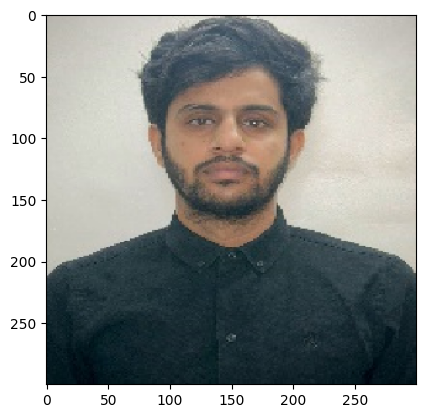

In [17]:
plt.imshow(img)

In [18]:
type(img)

PIL.Image.Image

In [21]:
datagen=ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')

In [22]:
img=image.img_to_array(img) #function hai ye in image

NameError: name 'img' is not defined

In [27]:
type(img)

numpy.ndarray

In [23]:
input_batch=img.reshape(1,300,300,3)

NameError: name 'img' is not defined

In [29]:
i=0

for output in datagen.flow(input_batch,batch_size=1,save_to_dir='aug'):
  i+=1
  if i>20:
    break

In [30]:
input_batch.shape

(1, 300, 300, 3)

In [44]:
batch_size=64

In [45]:
datagen=ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')

In [46]:
import os
downloads_folder = os.path.join(os.path.expanduser("~"), "Downloads")
aug_dir = os.path.join(downloads_folder, "aug")


In [47]:
train_datagen=ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest',rescale=1./255)

test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(r"C:\Users\mirma\Downloads\aug",target_size=(300,300),batch_size=1,class_mode='binary')
validation_datagen=test_datagen.flow_from_directory(r"C:\Users\mirma\Downloads\aug",target_size=(300,300),batch_size=1,class_mode='binary')

Found 33 images belonging to 2 classes.
Found 33 images belonging to 2 classes.


In [48]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(300,300,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3),input_shape=(300,300,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3),input_shape=(300,300,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

C:\Users\mirma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [50]:
model.optimizer='rmsprop'
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [53]:
history=model.fit(train_generator,steps_per_epoch=100,epochs=10,validation_data=validation_datagen,validation_steps=50)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7943 - loss: 0.7920 - val_accuracy: 0.8182 - val_loss: 0.4532
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8845 - loss: 0.4318 - val_accuracy: 0.8182 - val_loss: 0.3298
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7206 - loss: 1.3923 - val_accuracy: 0.6364 - val_loss: 0.5477
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8853 - loss: 0.4632 - val_accuracy: 0.6667 - val_loss: 0.7426
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8880 - loss: 0.4530 - val_accuracy: 0.9394 - val_loss: 0.1876
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8576 - loss: 0.6469 - val_accuracy: 0.9394 - val_loss: 0.1457
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8627 - loss: 0.5283 - val_accuracy: 0.9394 - val_loss: 0.1589
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8134 - loss: 0.7712 - val_accu

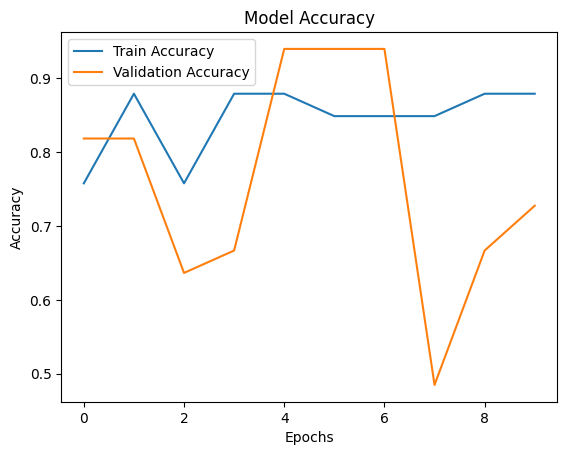

In [54]:
import matplotlib.pyplot as plt

# Suppose 'history' is returned from model.fit()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()
